In [141]:
!pwd

/naslx/projects/pn69si/mnmda001/students/mnmda004/exercise-students-2019/02_Python


In [142]:
!gzip -k -d -f  ../data/nasa/NASA_access_log_Jul95.gz

In [143]:
!head ../data/nasa/NASA_access_log_Jul95

199.72.81.55 - - [01/Jul/1995:00:00:01 -0400] "GET /history/apollo/ HTTP/1.0" 200 6245
unicomp6.unicomp.net - - [01/Jul/1995:00:00:06 -0400] "GET /shuttle/countdown/ HTTP/1.0" 200 3985
199.120.110.21 - - [01/Jul/1995:00:00:09 -0400] "GET /shuttle/missions/sts-73/mission-sts-73.html HTTP/1.0" 200 4085
burger.letters.com - - [01/Jul/1995:00:00:11 -0400] "GET /shuttle/countdown/liftoff.html HTTP/1.0" 304 0
199.120.110.21 - - [01/Jul/1995:00:00:11 -0400] "GET /shuttle/missions/sts-73/sts-73-patch-small.gif HTTP/1.0" 200 4179
burger.letters.com - - [01/Jul/1995:00:00:12 -0400] "GET /images/NASA-logosmall.gif HTTP/1.0" 304 0
burger.letters.com - - [01/Jul/1995:00:00:12 -0400] "GET /shuttle/countdown/video/livevideo.gif HTTP/1.0" 200 0
205.212.115.106 - - [01/Jul/1995:00:00:12 -0400] "GET /shuttle/countdown/countdown.html HTTP/1.0" 200 3985
d104.aa.net - - [01/Jul/1995:00:00:13 -0400] "GET /shuttle/countdown/ HTTP/1.0" 200 3985
129.94.144.152 - - [01/Jul/1995:00:00:13 -0400] "GET / HTTP/1.0" 

In [145]:
#* Which page was called the most?
!cat ../data/nasa/NASA_access_log_Jul95 | awk '{print $7}' | sort | uniq -c | sort -n  | tail -1

 111144 /images/NASA-logosmall.gif


In [146]:
#* What was the most frequent return code?
!cat ../data/nasa/NASA_access_log_Jul95 | awk -F' ' '{print $9}' | sort | uniq -c | sort -n | tail -1

1697914 200


In [175]:
#* How many errors occurred? What is the percentage of errors?
#!cat ../data/nasa/NASA_access_log_Jul95 | awk -F ' ' '{print $(NF-1)}' | grep -P '(\d){3}' | egrep -v '200' | wc -l
!ERR=$(cat ../data/nasa/NASA_access_log_Jul95 | awk -F' ' '{print $(NF-1)}' | grep -P '(\d){3}' | egrep -v '200' | wc -l) && TOTAL=$(wc -l ../data/nasa/NASA_access_log_Jul95 | awk '{print $1}') && echo "${ERR} ${TOTAL}"  | awk '{p = (100/$2)*$1; printf "Error:  %d Total: %d (%f%%)",$1,$2,p}'

Error:  190180 Total: 1891714 (10.053317%)

In [173]:
import os
TMP_DIR=os.path.join(os.getcwd(), "tmp")
os.environ["HADOOP_HOME"]="/naslx/projects/pn69si/mnmda001/students/software/hadoop-2.8.5"
os.environ["JAVA_HOME"]="/lrz/sys/compilers/java/jdk1.8.0_112"
os.environ["JAVA_OPTS"]="-Djava.io.tmpdir="+TMP_DIR
os.environ["HADOOP_OPTS"]="-Djava.io.tmpdir="+TMP_DIR
os.environ["PATH"]=os.path.join(os.environ["HADOOP_HOME"], "bin") + ":"+os.environ["PATH"]

In [140]:
!rm -rf /naslx/projects/pn69si/mnmda001/students/mnmda001/exercise-students-2019/03_MapReduce/out
!hadoop jar ${HADOOP_HOME}/share/hadoop/tools/lib/hadoop-streaming-2.8.5.jar -mapper 'python /naslx/projects/pn69si/mnmda001/students/mnmda001/exercise-students-2019/03_MapReduce/map_reduce.py map' -reducer 'python /naslx/projects/pn69si/mnmda001/students/mnmda001/exercise-students-2019/03_MapReduce/map_reduce.py reduce' -input ../data/nasa/NASA_access_log_Jul95 -output /naslx/projects/pn69si/mnmda001/students/mnmda001/exercise-students-2019/03_MapReduce/out  >/dev/null 2>/dev/null
!echo done

In [68]:
!cat  /naslx/projects/pn69si/mnmda001/students/mnmda001/exercise-students-2019/03_MapReduce/out/part-00000

total 8
drwxr-sr-x 2 mnmda001 pn69si 4096 Apr 15 14:27 .
drwxr-sr-x 4 mnmda001 pn69si 4096 Apr 15 14:27 ..
-rw-r--r-- 1 mnmda001 pn69si    8 Apr 15 14:27 ._SUCCESS.crc
-rw-r--r-- 1 mnmda001 pn69si   12 Apr 15 14:27 .part-00000.crc
-rw-r--r-- 1 mnmda001 pn69si    0 Apr 15 14:27 _SUCCESS
-rw-r--r-- 1 mnmda001 pn69si   64 Apr 15 14:27 part-00000
200	1696876
302	46546
304	132626
403	54
404	10713
500	62
501	14


In [195]:
!rm -rf /naslx/projects/pn69si/mnmda001/students/mnmda001/exercise-students-2019/03_MapReduce//tera_out_0001/
!time hadoop jar ${HADOOP_HOME}/share/hadoop/mapreduce/hadoop-mapreduce-examples-2.8.5.jar teragen 10000000  /naslx/projects/pn69si/mnmda001/students/mnmda001/exercise-students-2019/03_MapReduce/tera_out_0001/ >/dev/null 2>/dev/null


real	0m15.415s
user	0m18.507s
sys	0m1.412s


In [187]:
!rm -rf /naslx/projects/pn69si/mnmda001/students/mnmda001/exercise-students-2019/03_MapReduce/tera_sort_0001
!time hadoop jar ${HADOOP_HOME}/share/hadoop/mapreduce/hadoop-mapreduce-examples-2.8.5.jar terasort /naslx/projects/pn69si/mnmda001/students/mnmda001/exercise-students-2019/03_MapReduce/tera_out_0001  /naslx/projects/pn69si/mnmda001/students/mnmda001/exercise-students-2019/03_MapReduce/tera_sort_0001  >/dev/null 2>/dev/null


real	1m6.024s
user	1m41.472s
sys	0m7.364s



In [133]:
!rm -rf /naslx/projects/pn69si/mnmda001/students/mnmda001/exercise-students-2019/03_MapReduce/tera_validate_0001
!time hadoop jar ${HADOOP_HOME}/share/hadoop/mapreduce/hadoop-mapreduce-examples-2.8.5.jar teravalidate /naslx/projects/pn69si/mnmda001/students/mnmda001/exercise-students-2019/03_MapReduce/tera_sort_0001  /naslx/projects/pn69si/mnmda001/students/mnmda001/exercise-students-2019/03_MapReduce/tera_validate_0001 >/dev/null 2>/dev/null


real	0m1.865s
user	0m1.613s
sys	0m0.226s


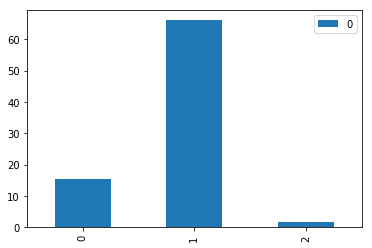

In [216]:
import pandas as pd
df = pd.DataFrame([[15.415],[66.024],[1.865]])
df.plot.bar(use_index=False)
